In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os

for root, dirs, files in os.walk("/root/.cache/kagglehub/"):
    for f in files:
        if f.endswith(".csv"):
            print(os.path.join(root, f))

/root/.cache/kagglehub/competitions/lmsys-chatbot-arena/test.csv
/root/.cache/kagglehub/competitions/lmsys-chatbot-arena/train.csv
/root/.cache/kagglehub/competitions/lmsys-chatbot-arena/sample_submission.csv


In [2]:
import os
notebook_dir = os.getcwd()
print(f"Current working directory: {notebook_dir}")

Current working directory: c:\Users\vkkak\sc4000\SC4000-Machine-Learning-Group-Project


In [3]:

notebook_dir = os.getcwd()
#print(f"Current working directory: {notebook_dir}")
data_dir = os.path.join(notebook_dir, "data")

In [4]:
import pandas as pd
import os

# Find the extracted data path
data_path = '/data'

train = pd.read_csv(os.path.join(data_dir, "train.csv"))
test = pd.read_csv(os.path.join(data_dir, "test.csv"))
sample = pd.read_csv(os.path.join(data_dir, "sample_submission.csv"))

#preview data
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Sample submission shape:", sample.shape)

#see the first few rows
train.head()

Train shape: (57477, 9)
Test shape: (3, 4)
Sample submission shape: (3, 4)


,id,model_a,model_b,prompt,response_a,response_b,winner_model_a,winner_model_b,winner_tie
0,30192,gpt-4-1106-preview,gpt-4-0613,"[""Is it morally right to try to have a certain...","[""The question of whether it is morally right ...","[""As an AI, I don't have personal beliefs or o...",1,0,0
1,53567,koala-13b,gpt-4-0613,"[""What is the difference between marriage lice...","[""A marriage license is a legal document that ...","[""A marriage license and a marriage certificat...",0,1,0
2,65089,gpt-3.5-turbo-0613,mistral-medium,"[""explain function calling. how would you call...","[""Function calling is the process of invoking ...","[""Function calling is the process of invoking ...",0,0,1
3,96401,llama-2-13b-chat,mistral-7b-instruct,"[""How can I create a test set for a very rare ...","[""Creating a test set for a very rare category...","[""When building a classifier for a very rare c...",1,0,0
4,198779,koala-13b,gpt-3.5-turbo-0314,"[""What is the best way to travel from Tel-Aviv...","[""The best way to travel from Tel Aviv to Jeru...","[""The best way to travel from Tel-Aviv to Jeru...",0,1,0


In [5]:
#clean and combine text
def combine_text(row):
    return (
        f"Prompt: {row['prompt']}\n\n"
        f"### Response A:\n{row['response_a']}\n\n"
        f"### Response B:\n{row['response_b']}"
    )

train["text"] = train.apply(combine_text, axis=1)
test["text"] = test.apply(combine_text, axis=1)

#create target labels (0=A, 1=B, 2=Tie)
train["label"] = train[["winner_model_a", "winner_model_b", "winner_tie"]].values.argmax(axis=1)

print(train[["text", "label"]].head(2))


                                                text  label
0  Prompt: ["Is it morally right to try to have a...      0
1  Prompt: ["What is the difference between marri...      1


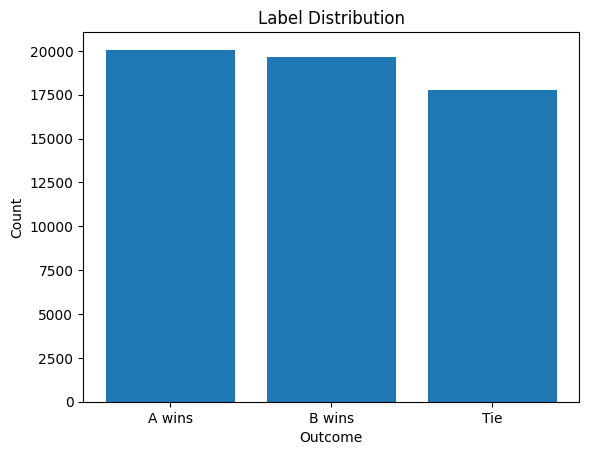

label
0    20064
1    19652
2    17761
Name: count, dtype: int64


In [ ]:
#check class distribution
import matplotlib.pyplot as plt

label_counts = train["label"].value_counts().sort_index()
label_names = ["A wins", "B wins", "Tie"]

plt.bar(label_names, label_counts)
plt.title("Label Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.show()

print(label_counts)


2.3 section 

In [7]:
%pip install textblob


   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.9 MB/s  0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------------- -------------------------- 0.5/1.5 MB 5.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 4.0 MB/s  0:00:00

   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ---------------------------------------- 0/2 [nltk]
   ----

In [10]:
#word count calculation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Word counts
train["prompt_len"] = train["prompt"].str.split().str.len()
train["respA_len"] = train["response_a"].str.split().str.len()
train["respB_len"] = train["response_b"].str.split().str.len()

print(train[["prompt_len","respA_len","respB_len"]].describe()[["prompt_len","respA_len","respB_len"]])


         prompt_len     respA_len     respB_len
count  57477.000000  57477.000000  57477.000000
mean      54.006333    204.371070    205.177254
std      143.929514    218.697891    220.905999
min        1.000000      1.000000      1.000000
25%        9.000000     64.000000     65.000000
50%       16.000000    162.000000    163.000000
75%       40.000000    279.000000    280.000000
max     4719.000000   9021.000000   7886.000000


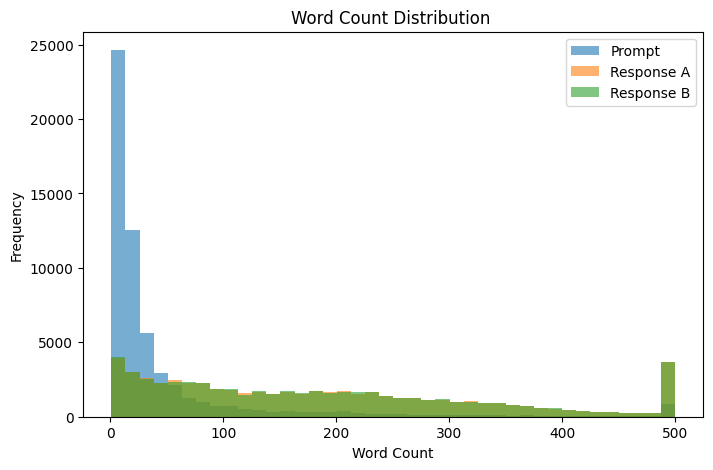

In [16]:
#histogram of lengths 
plt.figure(figsize=(8,5))
plt.hist(train["prompt_len"].clip(upper=500), bins=40, alpha=0.6, label="Prompt")
plt.hist(train["respA_len"].clip(upper=500), bins=40, alpha=0.6, label="Response A")
plt.hist(train["respB_len"].clip(upper=500), bins=40, alpha=0.6, label="Response B")
plt.title("Word Count Distribution ")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.legend()
plt.show()



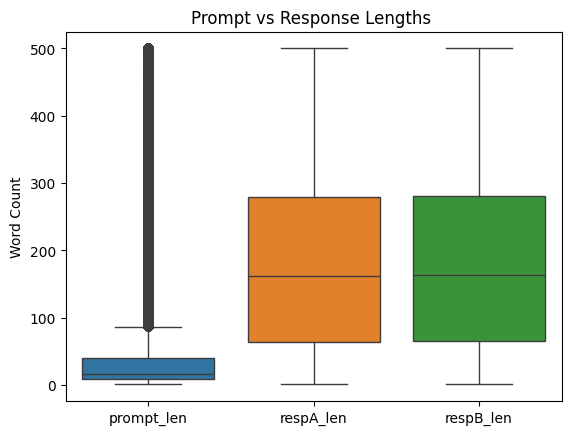

In [20]:
#boxplot 
sns.boxplot(data=train[["prompt_len","respA_len","respB_len"]]
            .clip(upper=500))
plt.title("Prompt vs Response Lengths ")
plt.ylabel("Word Count")
plt.show()



C:\Users\vkkak\AppData\Local\Temp\ipykernel_8480\2132575017.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_rate = train.groupby(bins)["A_win"].mean()


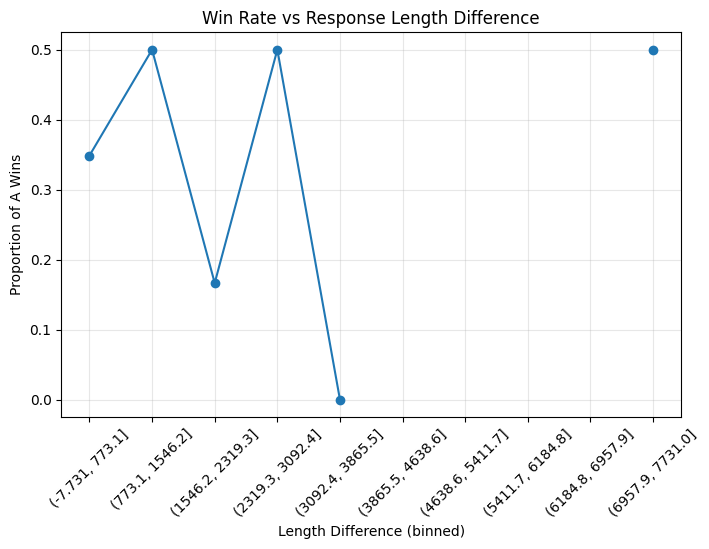

In [18]:
# verbosity bias: win rate vs length difference 
# Identify winner (A, B, or tie)
train["winner"] = train[["winner_model_a","winner_model_b","winner_tie"]].idxmax(axis=1)

# Compute absolute difference in response lengths
train["len_diff"] = abs(train["respA_len"] - train["respB_len"])
train["A_win"] = (train["winner"] == "winner_model_a").astype(int)

# Bin by length difference
bins = pd.cut(train["len_diff"], bins=10)
win_rate = train.groupby(bins)["A_win"].mean()

plt.figure(figsize=(8,5))
plt.plot(win_rate.index.astype(str), win_rate.values, marker="o")
plt.xticks(rotation=45)
plt.title("Win Rate vs Response Length Difference")
plt.xlabel("Length Difference (binned)")
plt.ylabel("Proportion of A Wins")
plt.grid(True, alpha=0.3)
plt.show()


section 2.4

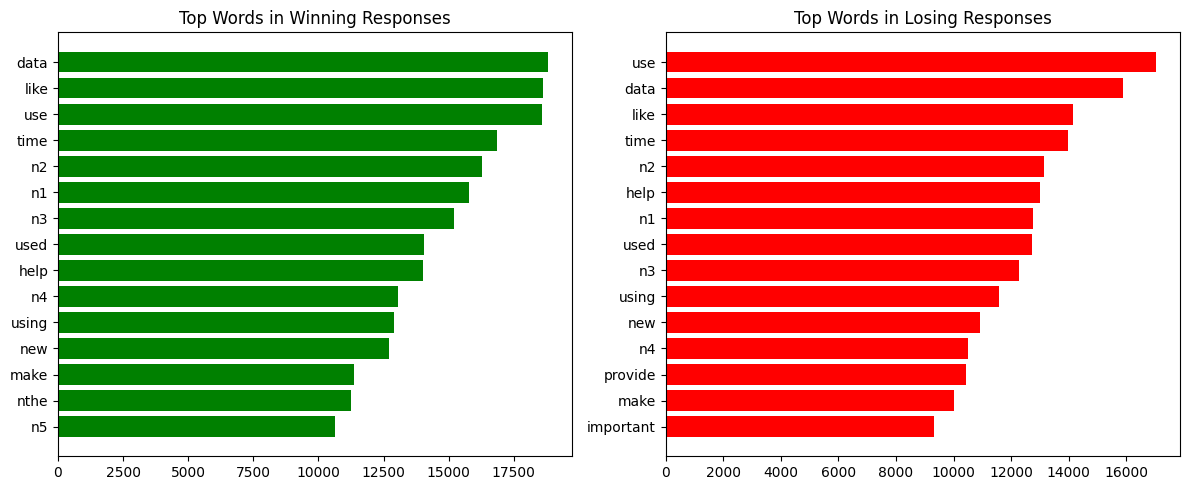

In [21]:
#tf-idf and keyword extraction
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Identify winner label
train["winner"] = train[["winner_model_a","winner_model_b","winner_tie"]].idxmax(axis=1)

# Separate winning and losing responses
win_texts = train.loc[train["winner"]=="winner_model_a","response_a"].tolist() + \
            train.loc[train["winner"]=="winner_model_b","response_b"].tolist()
lose_texts = train.loc[train["winner"]=="winner_model_a","response_b"].tolist() + \
             train.loc[train["winner"]=="winner_model_b","response_a"].tolist()

# Vectorize
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
win_counts = vectorizer.fit_transform(win_texts)
lose_counts = vectorizer.transform(lose_texts)

terms = np.array(vectorizer.get_feature_names_out())
freq_win = np.asarray(win_counts.sum(axis=0)).ravel()
freq_lose = np.asarray(lose_counts.sum(axis=0)).ravel()

# Top 15 words each
top_win_idx = freq_win.argsort()[-15:][::-1]
top_lose_idx = freq_lose.argsort()[-15:][::-1]

top_win = pd.DataFrame({"word": terms[top_win_idx], "count": freq_win[top_win_idx]})
top_lose = pd.DataFrame({"word": terms[top_lose_idx], "count": freq_lose[top_lose_idx]})

# Plot
fig, axes = plt.subplots(1,2, figsize=(12,5))
axes[0].barh(top_win["word"], top_win["count"], color="green")
axes[0].set_title("Top Words in Winning Responses")
axes[0].invert_yaxis()

axes[1].barh(top_lose["word"], top_lose["count"], color="red")
axes[1].set_title("Top Words in Losing Responses")
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()


In [23]:
%pip install -q sentence-transformers


Note: you may need to restart the kernel to use updated packages.


In [ ]:
#semantic similarity 
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity

model = SentenceTransformer("all-MiniLM-L6-v2")
emb_prompt = model.encode(train["prompt"].tolist(), show_progress_bar=True)
emb_respA  = model.encode(train["response_a"].tolist(), show_progress_bar=True)
emb_respB  = model.encode(train["response_b"].tolist(), show_progress_bar=True)

train["simA"] = [cosine_similarity([p],[a])[0,0] for p,a in zip(emb_prompt, emb_respA)]
train["simB"] = [cosine_similarity([p],[b])[0,0] for p,b in zip(emb_prompt, emb_respB)]

sns.boxplot(data=train.melt(value_vars=["simA","simB"], var_name="Response", value_name="Similarity"))
plt.title("Semantic Similarity with Prompt (A vs B)")
plt.show()


baseline model

In [ ]:
#baseline model
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

#train/validation split
X_train, X_valid, y_train, y_valid = train_test_split(
    train["text"], train["label"], test_size=0.2, random_state=42, stratify=train["label"]
)

#TF-IDF vectorizer
vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(1,3), min_df=3, max_features=200000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_valid_tfidf = vectorizer.transform(X_valid)
X_test_tfidf  = vectorizer.transform(test["text"])

#train logistic regression
model = LogisticRegression(max_iter=2000, C=2.0, multi_class="multinomial", n_jobs=-1)
model.fit(X_train_tfidf, y_train)

#predict probabilities
valid_preds = model.predict_proba(X_valid_tfidf)
test_preds  = model.predict_proba(X_test_tfidf)

#evaluate validation performance
print("Validation Log Loss:", log_loss(y_valid, valid_preds))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Validation Log Loss: 1.0920630275787069


In [ ]:
!pip install lightgbm

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import log_loss

lgb = LGBMClassifier(
    objective="multiclass",
    num_class=3,
    learning_rate=0.05,
    n_estimators=1000,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8
)

lgb.fit(X_train_tfidf, y_train)
valid_preds = lgb.predict_proba(X_valid_tfidf)
print("LightGBM Log Loss:", log_loss(y_valid, valid_preds))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 41.312220 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2817042
[LightGBM] [Info] Number of data points in the train set: 45981, number of used features: 32518
[LightGBM] [Info] Start training from score -1.052457
[LightGBM] [Info] Start training from score -1.073231
[LightGBM] [Info] Start training from score -1.174353


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Log Loss: 1.0979913282596387
